Logistic Regression

This dataset includes details about various shoes, such as brand, model, type, gender, and size. You can formulate a classification problem, like predicting whether a shoe belongs to a particular category based on its size and other features.​

In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# Reading the .csv file
data = pd.read_csv('/content/Shoe prices.csv')

In [70]:
data

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [71]:
#printing the head of the data
data.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [72]:
# printing the shape of the data
print(data.shape)

(1006, 8)


In [73]:
# Getting the basic information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB
None


In [74]:
#getting the count of unique values
print(data.nunique())

Brand           10
Model          239
Type            18
Gender           2
Size            13
Color           82
Material        34
Price (USD)     33
dtype: int64


In [76]:
# dropping th sepal_length column
data_new = data.drop('Color',axis=1)
data_new.head()

,Brand,Model,Type,Gender,Size,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Mesh,$80.00


In [78]:
# perform one hot encoding for the categorical data
encoded_data = pd.get_dummies(data_new, columns=['Gender'], drop_first=True)
encoded_data.head()

,Brand,Model,Type,Size,Material,Price (USD),Gender_Women
0,Nike,Air Jordan 1,Basketball,US 10,Leather,$170.00,False
1,Adidas,Ultra Boost 21,Running,US 9.5,Primeknit,$180.00,False
2,Reebok,Classic Leather,Casual,US 11,Leather,$75.00,False
3,Converse,Chuck Taylor,Casual,US 8,Canvas,$55.00,True
4,Puma,Future Rider,Lifestyle,US 7.5,Mesh,$80.00,True


In [79]:
# getting the independent and dependent variable
X = encoded_data.drop('Brand',axis=1)
Y = encoded_data[['Brand']]


In [80]:
Y

,Brand
0,Nike
1,Adidas
2,Reebok
3,Converse
4,Puma
...,...
1001,New Balance
1002,Asics
1003,Fila
1004,Skechers


In [83]:
# perform one hot encoding for the categorical data
encoded_data = pd.get_dummies(data_new, columns=['Gender','Brand'], drop_first=True) # Include 'Brand' in the columns to be encoded.
encoded_data.head()

,Model,Type,Size,Material,Price (USD),Gender_Women,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,Brand_Vans
0,Air Jordan 1,Basketball,US 10,Leather,$170.00,False,False,False,False,False,True,False,False,False,False
1,Ultra Boost 21,Running,US 9.5,Primeknit,$180.00,False,False,False,False,False,False,False,False,False,False
2,Classic Leather,Casual,US 11,Leather,$75.00,False,False,False,False,False,False,False,True,False,False
3,Chuck Taylor,Casual,US 8,Canvas,$55.00,True,False,True,False,False,False,False,False,False,False
4,Future Rider,Lifestyle,US 7.5,Mesh,$80.00,True,False,False,False,False,False,True,False,False,False


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv('/content/Shoe prices.csv')

# Define your target (you can adjust this as needed)
# Example: Let's predict if the shoe is for 'Men' or not
data['target'] = data['Gender'].apply(lambda x: 1 if x == 'Men' else 0)

# Drop the original target and irrelevant columns
X = data.drop(columns=['Gender', 'target'])  # Drop target and any non-feature columns
y = data['target']

# Automatically find categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

# Create pipeline with logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model', 'Type',
                                                   'Size', 'Color', 'Material',
                                                   'Price (USD)'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [90]:
# Evaluating the model
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8613861386138614


In [91]:
from sklearn.metrics import confusion_matrix

In [93]:
pred=model.predict(X_test)

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,pred)

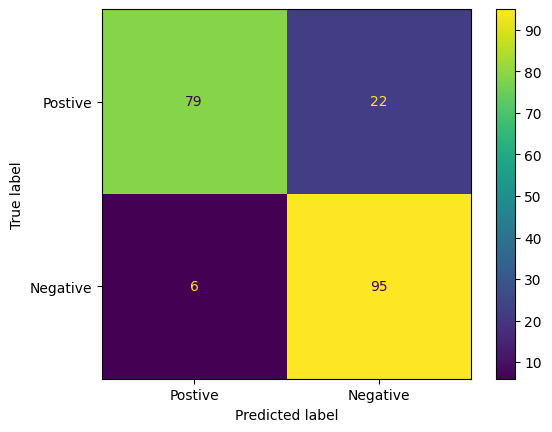

In [95]:
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Postive','Negative'])
dis.plot()
plt.show()